# Scraping 




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
import requests
import bs4
from bs4 import BeautifulSoup
from pandas import DataFrame
from google.colab import files





## Chapter and Episode


### Data Acquisition
Web Screaping of a **Html** page thanks to pandas **read_html** function,
to read the documentation of the function: [link text](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)


In [2]:
df = pd.read_html('https://onepiece.fandom.com/wiki/List_of_Canon_Characters')

Character names from A to M

In [3]:
A_M = df[0] # prendiamo in considerazione la prima tabella della pagina 
A_M.drop(columns=A_M.columns[0], axis=1, inplace=True) # eliminiamo colonne inutili 
A_M

,Name,Chapter,Episode,Year,Note
0,A O,551.0,0460,2009,His name was revealed in the Green data book.
1,Abdullah,704.0,0632,2013,NaN
2,Absalom,444.0,0339,2007,NaN
3,Acilia,706.0,0652,2013,NaN
4,Adele,608.0,0527,2010,Her name was revealed in the Blue Deep data book.
...,...,...,...,...,...
864,Mugren,966.0,0966,2020,His name was revealed in SBS Volume 96.
865,Mukkashimi Tower,707.0,0637,2013,His name was revealed in SBS Volume 75.
866,Mummy,706.0,0652,2013,NaN
867,Mummy Mee,79.0,0035,1999,Her name was revealed in Blue data book.



Character names from N to Z

In [4]:
N_Z = df[1]
N_Z.drop(columns=N_Z.columns[0], axis=1, inplace=True)
N_Z

,Name,Chapter,Episode,Year,Note
0,Nako,77.0,32.0,1999,His name was revealed in the Blue data book.
1,Nami,8.0,1.0,1997,Her name was revealed in Chapter 9.
2,Namur,552.0,461.0,2009,His name was revealed in SBS Volume 58.
3,Nangi,988.0,997.0,2020,NaN
4,Napoleon,651.0,571.0,2012,His name was revealed in Chapter 853.
...,...,...,...,...,...
443,Zeus,827.0,786.0,2016,His name was revealed in Chapter 844. He was f...
444,Zodia,553.0,462.0,2009,His name was revealed in the Green data book.
445,Zotto,533.0,432.0,2009,His name was revealed in the Vivre Card.
446,Zucca,564.0,489.0,2009,His name was revealed in the Green data book.


**Concatenate** the results

In [5]:
name = pd.concat([A_M,N_Z])
name.info()
#If a pandas DataFrame column has the object dtype, you can usually consider it as a string.
name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1317 entries, 0 to 447
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     1317 non-null   object 
 1   Chapter  1299 non-null   float64
 2   Episode  1219 non-null   object 
 3   Year     1317 non-null   int64  
 4   Note     892 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 61.7+ KB


,Name,Chapter,Episode,Year,Note
0,A O,551.0,0460,2009,His name was revealed in the Green data book.
1,Abdullah,704.0,0632,2013,NaN
2,Absalom,444.0,0339,2007,NaN
3,Acilia,706.0,0652,2013,NaN
4,Adele,608.0,0527,2010,Her name was revealed in the Blue Deep data book.
...,...,...,...,...,...
443,Zeus,827.0,786.0,2016,His name was revealed in Chapter 844. He was f...
444,Zodia,553.0,462.0,2009,His name was revealed in the Green data book.
445,Zotto,533.0,432.0,2009,His name was revealed in the Vivre Card.
446,Zucca,564.0,489.0,2009,His name was revealed in the Green data book.


### Data Cleaning


---


We find the null values and go to eliminate them 

In [6]:
nullo = name['Episode'].isnull().sum()
print('i valori nulli sono: ' , nullo)
name = name.dropna(subset=['Episode'])

i valori nulli sono:  98


the episode number on line 837 doesn't make sense (SP12), let's go delete it 

In [7]:
print(name.loc[name['Episode'] == 'SP12'])
name.drop(837, inplace = True)
name = name[['Name', 'Chapter', 'Episode', 'Year']]

       Name  Chapter Episode  Year Note
837  Mornin     23.0    SP12  1998  NaN


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


We transform the **Episode** column into integer values.

In [8]:
if name['Episode'] is None : 
  name['Episode']
else: 
  name['Episode'] = name['Episode'].astype(np.int64)
display(name.dtypes)
name

Name        object
Chapter    float64
Episode      int64
Year         int64
dtype: object

,Name,Chapter,Episode,Year
0,A O,551.0,460,2009
1,Abdullah,704.0,632,2013
2,Absalom,444.0,339,2007
3,Acilia,706.0,652,2013
4,Adele,608.0,527,2010
...,...,...,...,...
443,Zeus,827.0,786,2016
444,Zodia,553.0,462,2009
445,Zotto,533.0,432,2009
446,Zucca,564.0,489,2009


In [9]:
 personaggi = name[['Name', 'Episode','Chapter', 'Year']]
 personaggi.head(5)

,Name,Episode,Chapter,Year
0,A O,460,551.0,2009
1,Abdullah,632,704.0,2013
2,Absalom,339,444.0,2007
3,Acilia,652,706.0,2013
4,Adele,527,608.0,2010


## Data Visualization 






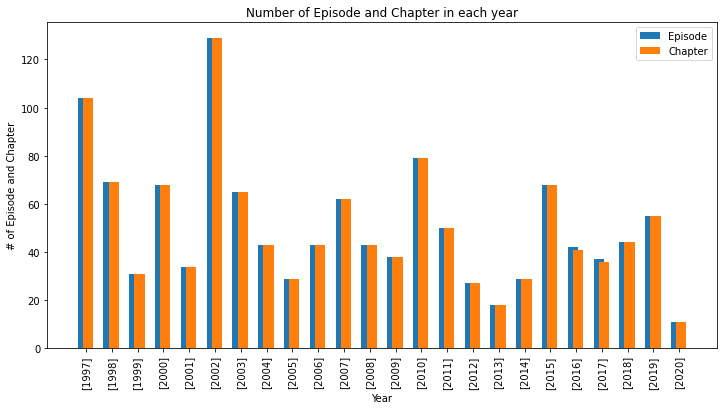

<Figure size 864x432 with 0 Axes>

In [10]:
# Data Preparaton for visualization
Episode_x_year = personaggi.groupby(pd.Grouper(key='Year', axis=0)).count()
Episode_x_year.reset_index(inplace=True)
Episode_x_year['Chapter'] = Episode_x_year['Chapter'].astype(np.int64)
X = Episode_x_year[['Year']]
Episode = Episode_x_year[['Episode']].squeeze()
Chapter = Episode_x_year[['Chapter']].squeeze()
x_axis = np.arange(len(X))
X_list = X.values.tolist()
X_list.sort()

# Parameters
width = 0.25
plt.rcParams['figure.figsize'] = (12,6)

# Multi bar Chart

plt.bar(x_axis , Episode, width=0.4, label = 'Episode')
plt.bar(x_axis +0.2, Chapter, width=0.4, label = 'Chapter')


# Xticks
plt.xticks(x_axis, X)
plt.xlabel("Year")
plt.ylabel("# of Episode and Chapter")
plt.title("Number of Episode and Chapter in each year")
plt.legend()
plt.xticks(x_axis + width/2,X_list, rotation=90)

# Display
plt.show()
plt.savefig('Number of Episode and Chapter in each year.jpg')

Come si può notare dal barchart il lavoro svolto dall'autore Oda Eiichirō e l'adattamento anime vanno di pari passo durante gli anni.

In [11]:
#personaggi.to_csv('personaggi')


## Episodes Anime
This dataset was downloaded from the Kaggle platform: [link text](https://www.kaggle.com/datasets/aditya2803/one-piece-anime)


#### Data Aquisition

In [12]:
opk = pd.read_csv('https://raw.githubusercontent.com/Giocornacchia97/DB_dataman-/main/ONE_PIECE.csv')
opk.head(3)

,Unnamed: 0,rank,trend,season,episode,name,start,total_votes,average_rating
0,0,"24,129",18,1,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647,7.6
1,1,"29,290",11,1,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473,7.8
2,2,"32,043",7,1,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428,7.7


#### Data Cleaning 

In [13]:
rank = opk[['rank']]
for k in rank:
    rank[k] = [float(item.replace(',', '.')) if type(item) == str and ',' in item
        else item for item in rank[k]]
opk[['rank']] = rank

opk.drop(columns = opk.columns[0], axis = 2, inplace = True)
opk['season'].unique() # [1], visto che mi da una stagione sola, questa colonna è ininfluente 
opk.drop(columns = opk[['season']], axis =1, inplace = True ) 
opk.drop(columns = opk[['trend']], axis =1, inplace = True ) 
opk.columns = ['Rank','Episode','Name_Episode', ' Start', 'Total_votes','Average_rating']
opk.at[956,'Total_votes']='2.862'# la riga aveva un valore con la virgola e non poteva essserte trasformato in un intero 
opk['Total_votes'] = pd.to_numeric(opk['Total_votes'])

#opk.info()
opk

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rank,Episode,Name_Episode,Start,Total_votes,Average_rating
0,24.129,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647.000,7.6
1,29.290,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473.000,7.8
2,32.043,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428.000,7.7
3,28.818,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449.000,8.1
4,37.113,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370.000,7.5
...,...,...,...,...,...,...
953,41.448,954,Its Name is Enma! Oden's Meito!,2020,302.000,7.7
954,35.342,955,&quot;A New Alliance?! Kaido's Army Gathers&quot;,2020,407.000,7.4
955,33.715,956,Ticking Down to the Great Battle! The Straw Ha...,2020,353.000,8.2
956,2.940,957,Big News! The Warlords Attack Incident,2021,2.862,9.1


### Data Visualization 

scatterplot with **seasborn** 

In [14]:
opk.head(5)

,Rank,Episode,Name_Episode,Start,Total_votes,Average_rating
0,24.129,1,I'm Luffy! The Man Who Will Become the Pirate ...,1999,647.0,7.6
1,29.290,2,"The Great Swordsman Appears! Pirate Hunter, Ro...",1999,473.0,7.8
2,32.043,3,Morgan vs. Luffy! Who's This Beautiful Young G...,1999,428.0,7.7
3,28.818,4,Luffy's Past! The Red-haired Shanks Appears!,1999,449.0,8.1
4,37.113,5,"Fear, Mysterious Power! Pirate Clown Captain B...",1999,370.0,7.5


[Text(0.5, 1.0, 'Episode per Average reting ')]

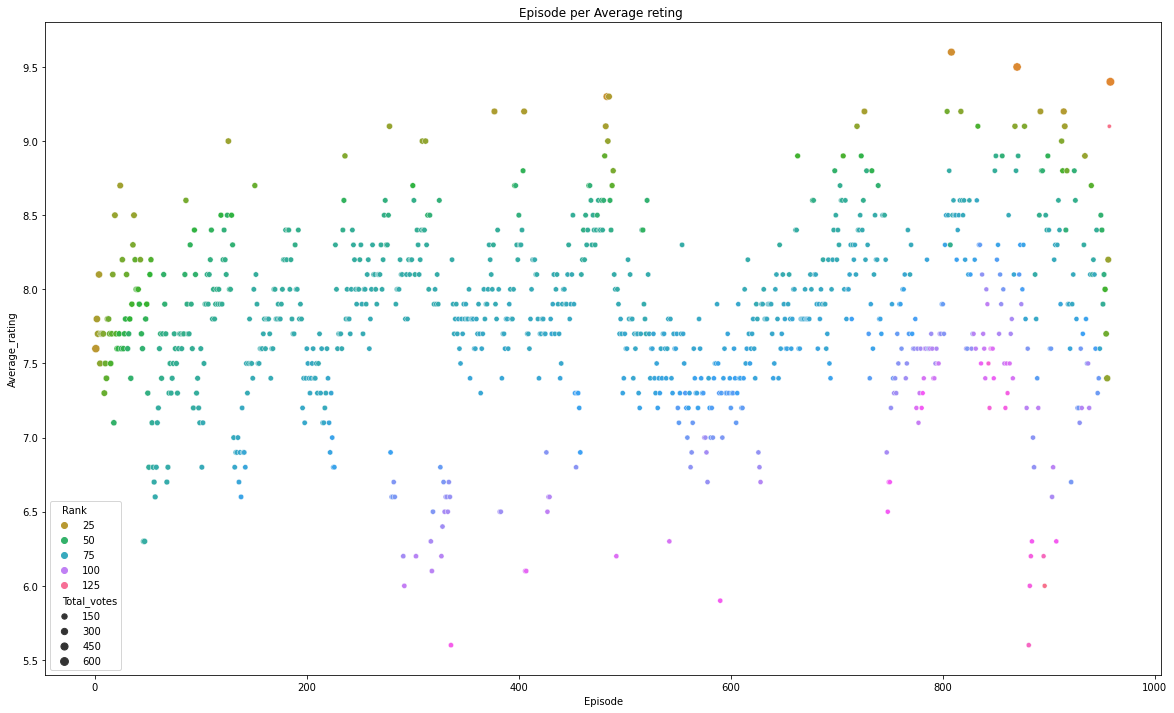

In [15]:
# Data Preparaton for visualization
opk.replace(to_replace= 'Total_votes', )

# Parameters
plt.rcParams['figure.figsize']= 20,12

#Scatterplot
sns.scatterplot(x = 'Episode', y= 'Average_rating',size = 'Total_votes', hue = 'Rank', s= 30, palette="husl", legend = 'auto', data = opk).set(title='Episode per Average reting ')
#plt.savefig("Scatter_episode.png")
#files.download("Scatter_episode.png") 

In [16]:
opk.to_csv('opk')


Reperibile : [link text](https://github.com/Giocornacchia97/DB_dataman-/blob/main/opk)



## Crews


#### BeautifulSoup
Documentazione: [link text](https://beautiful-soup-4.readthedocs.io/en/latest/)



###  Data Acquisition

In [17]:
url = "https://onepiece.fandom.com/it/wiki/Lista_di_personaggi_di_One_Piece"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

Estrapolo le ciurme attreverso l'attributo class 
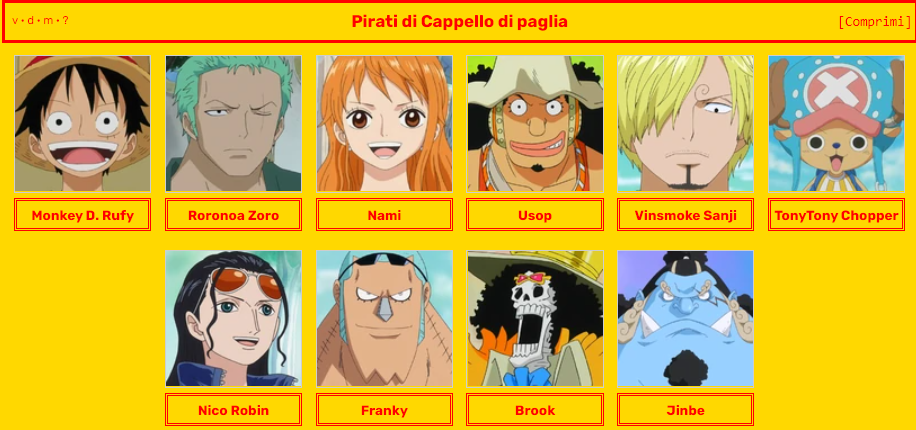

Doppio **ciclo for** per iterare attraverso la galleria i-esima i personaggi e le ciurme associate 

In [18]:
temp = [i for i in range(0, 87)]
buffer = []
for t in temp:
    gallery = soup.find("div", attrs={'id':f"gallery-{t}"})
    personaggi = gallery.findAll("div", attrs={"class": "lightbox-caption"})
    l = []
    nome_ciurma = gallery.findPrevious("span", attrs={"class": "mw-headline"})
    name = nome_ciurma.text
    #buffer[name] = []
    for i in range(len(personaggi)):
      nome_personaggio =personaggi[i].text
      nome_personaggio = nome_personaggio.split('(')[0]
      buffer.append([name,nome_personaggio]) 

### Data Cleaning

In [19]:
'nome_personaggio'.split('(')
pd.DataFrame(buffer)
Nomi_ciurme = DataFrame(buffer, columns = ['Nome_ciurma','Nome'])
Nomi_ciurme.head(5)

,Nome_ciurma,Nome
0,Pirati di Cappello di paglia,Monkey D. Rufy
1,Pirati di Cappello di paglia,Roronoa Zoro
2,Pirati di Cappello di paglia,Nami
3,Pirati di Cappello di paglia,Usop
4,Pirati di Cappello di paglia,Vinsmoke Sanji


**Donquijote Do Flamingo** is introduced as Donquijote's pirate captain and world nobleman, so let's go ahead and divide them up 

In [20]:
print(Nomi_ciurme.loc[(Nomi_ciurme.Nome == 'Donquijote Do Flamingo')])
Nomi_ciurme.at[386,'Nome_ciurma']= 'Pirati di Donquijote (arrestati)'
Nomi_ciurme.at[536 ,'Nome_ciurma']= 'Nobili mondiali'
print(Nomi_ciurme.loc[(Nomi_ciurme.Nome == 'Donquijote Do Flamingo')])

    Nome_ciurma                    Nome
386    Capitano  Donquijote Do Flamingo
536  In passato  Donquijote Do Flamingo
                          Nome_ciurma                    Nome
386  Pirati di Donquijote (arrestati)  Donquijote Do Flamingo
536                   Nobili mondiali  Donquijote Do Flamingo


BeautifulSoup in some cases did not make it possible to read the crew because of the overlap of a subchapter, we went to fix this problem.

In [21]:
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Sakazuki'),'Nome_ciurma']='Marina'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Mr. Zero'),'Nome_ciurma']='Baroque Works'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Gekko Moria'),'Nome_ciurma']='Pirati di Thriller Bark'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Kaido'),'Nome_ciurma']='Pirati delle cento bestie'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Charlotte LinLin'),'Nome_ciurma']='Pirati di Big Mom'
Nomi_ciurme.at[(Nomi_ciurme.Nome == '????'),'Nome_ciurma']='Nobili mondiali'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Donquijote Do Flamingo'),'Nome_ciurma']='Pirati di Donquijote (arrestati)'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Monkey D. Dragon'),'Nome_ciurma']='Armata rivoluzionaria'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Ener'),'Nome_ciurma']='Guerrieri di Ener'
Nomi_ciurme.at[(Nomi_ciurme.Nome == 'Spandam'),'Nome_ciurma']='CP9'

In [22]:
crew = Nomi_ciurme['Nome_ciurma'] 
real_ciurme=['Pirati di Cappello di paglia','Pirati Heart','Nove foderi rossi','Abitanti di Zo','Pirati di Kidd','Pirati splendidi','Pirati Barto club',
             'Naviglio degli otto tesori','Pirati di Ideo','Pirati Tontatta','Nuovi pirati giganti guerrieri','Grande flotta Yonta Maria','Pirati di Roger (sciolti)',
             'Pirati di Barbabianca (sciolti)','Pirati di Big Mom','Pirati delle cento bestie' ,'Pirati del Rosso','Pirati di Barbanera','Pirati di Donquijote (arrestati)',
             'Piratesse Kuja','Baroque Works','Pirati di Thriller Bark','Pirati del Sole','Armata rivoluzionaria','Nobili mondiali','CP9','Marina','Non canonici','Galley-La company',
             'Guerrieri di Ener','Germa 66', 'Famiglia Kozuki']
list_3 = []
list_4 = []

for i in range(len(crew)):
           if crew[i] in real_ciurme:
                    list_3.append(crew[i])
           else:
                crew[i] =  crew[i-1]
                list_4.append(crew[i])
Nomi_ciurme['Nome_ciurma'] = crew
Nomi_ciurme


,Nome_ciurma,Nome
0,Pirati di Cappello di paglia,Monkey D. Rufy
1,Pirati di Cappello di paglia,Roronoa Zoro
2,Pirati di Cappello di paglia,Nami
3,Pirati di Cappello di paglia,Usop
4,Pirati di Cappello di paglia,Vinsmoke Sanji
...,...,...
722,Famiglia Kozuki,Kozuki Sukiyaki
723,Famiglia Kozuki,Kozuki Oden
724,Famiglia Kozuki,Kozuki Toki
725,Famiglia Kozuki,Kozuki Momonosuke


We eliminate non-canonical characters 

In [23]:
index_names = Nomi_ciurme[Nomi_ciurme['Nome_ciurma']== 'Non canonici'].index
Nomi_ciurme.drop(index_names, inplace = True)
Nomi_ciurme
#Nomi_ciurme.to_csv('Nomi_ciurme_11_06_22')

,Nome_ciurma,Nome
0,Pirati di Cappello di paglia,Monkey D. Rufy
1,Pirati di Cappello di paglia,Roronoa Zoro
2,Pirati di Cappello di paglia,Nami
3,Pirati di Cappello di paglia,Usop
4,Pirati di Cappello di paglia,Vinsmoke Sanji
...,...,...
722,Famiglia Kozuki,Kozuki Sukiyaki
723,Famiglia Kozuki,Kozuki Oden
724,Famiglia Kozuki,Kozuki Toki
725,Famiglia Kozuki,Kozuki Momonosuke


For the other datasets, we used a google extension that allowed us to download the data more quickly.

We used the following tool: https://chrome.google.com/webstore/detail/web-scraper-free-web-scra/jnhgnonknehpejjnehehllkliplmbmhn?hl=en